### This notebook explores the date of the first COVID-19 case recorded for each country and how many days it took the country to reach 500 and 1000 cases.   
The dataset used is provided by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE) and can be found [here](https://github.com/CSSEGISandData/COVID-19). A point to note is that the dataset begins from 1/22/20 and hence first cases discovered prior to the date are treated to be effective from this date. This is specifically relevant to the context of China.   

We can see the exponential increase in number of cases recorded (could be due to both the quick spread of infection/ importation and also increased pace in testing) where the number of days to reach 1000 cases from 500 cases (average of 4 days) is much shorter than that from first case to 500 cases (average of 29 days).  

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [3]:
data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,174,237,273,281,299,349,367,423,444,484
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,243,259,277,304,333,361,377,383,400,409
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,716,847,986,1171,1251,1320,1423,1468,1572,1666
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,376,390,428,439,466,501,525,545,564,583
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,7,8,8,8,10,14,16,17,19,19


In [4]:
data.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
1/23/20             int64
1/24/20             int64
1/25/20             int64
1/26/20             int64
1/27/20             int64
1/28/20             int64
1/29/20             int64
1/30/20             int64
1/31/20             int64
2/1/20              int64
2/2/20              int64
2/3/20              int64
2/4/20              int64
2/5/20              int64
2/6/20              int64
2/7/20              int64
2/8/20              int64
2/9/20              int64
2/10/20             int64
2/11/20             int64
2/12/20             int64
2/13/20             int64
2/14/20             int64
2/15/20             int64
2/16/20             int64
                   ...   
3/11/20             int64
3/12/20             int64
3/13/20             int64
3/14/20             int64
3/15/20             int64
3/16/20             int64
3/17/20             int64
3/18/20     

#### Getting the date of the first non-zero record for each country 

In [5]:
data['first_nonzero'] = data.iloc[:,4:].ne(0).idxmax(axis=1)

In [6]:
data['first_nonzero']

0      2/24/20
1       3/9/20
2      2/25/20
3       3/2/20
4      3/20/20
5      3/13/20
6       3/3/20
7       3/1/20
8      3/13/20
9      1/26/20
10      3/4/20
11     1/29/20
12      2/1/20
13      3/2/20
14     1/26/20
15     2/29/20
16     2/25/20
17      3/1/20
18     3/16/20
19     2/24/20
20      3/8/20
21     3/17/20
22     2/28/20
23      2/4/20
24     3/16/20
25      3/6/20
26     3/11/20
27      3/5/20
28     2/26/20
29      3/9/20
        ...   
233    3/22/20
234    3/22/20
235    3/22/20
236    3/22/20
237    3/23/20
238    1/22/20
239    3/24/20
240    3/24/20
241     3/5/20
242    3/25/20
243    3/25/20
244    3/25/20
245    3/26/20
246    3/26/20
247    3/26/20
248    3/27/20
249    3/28/20
250    3/28/20
251    3/28/20
252    3/28/20
253    3/30/20
254    3/31/20
255    3/31/20
256     4/2/20
257     4/2/20
258     4/4/20
259     4/5/20
260     4/5/20
261     4/5/20
262     4/6/20
Name: first_nonzero, Length: 263, dtype: object

In [7]:
data['first_nonzero'].dtypes

dtype('O')

In [8]:
#converting to date format
data['first_nonzero'] = pd.to_datetime(data['first_nonzero'],errors='coerce')

In [9]:
data[data['first_nonzero'].isnull()]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,first_nonzero


In [10]:
data.shape

(263, 84)

#### Getting the date which 500 cases were hit 

In [11]:
data['first_fivehundred'] = data.iloc[:,4:83].ge(500).idxmax(axis=1) 

In [12]:
data['first_fivehundred'] = pd.to_datetime(data['first_fivehundred'],errors='coerce')

In [13]:
#somehow the first date 1/22/20 is reflected if less than 500 so we have to correct the logic
data.loc[data['first_fivehundred'] <= data['first_nonzero'], 'first_fivehundred'] = np.nan

In [14]:
data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,first_nonzero,first_fivehundred
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,273,281,299,349,367,423,444,484,2020-02-24,NaT
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,277,304,333,361,377,383,400,409,2020-03-09,NaT
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,986,1171,1251,1320,1423,1468,1572,1666,2020-02-25,2020-03-29
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,428,439,466,501,525,545,564,583,2020-03-02,2020-04-05
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,8,8,10,14,16,17,19,19,2020-03-20,NaT


In [15]:
data['days_to_500'] = data['first_fivehundred'] - data['first_nonzero']

In [16]:
data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,first_nonzero,first_fivehundred,days_to_500
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,281,299,349,367,423,444,484,2020-02-24,NaT,NaT
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,304,333,361,377,383,400,409,2020-03-09,NaT,NaT
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1171,1251,1320,1423,1468,1572,1666,2020-02-25,2020-03-29,33 days
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,439,466,501,525,545,564,583,2020-03-02,2020-04-05,34 days
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,8,10,14,16,17,19,19,2020-03-20,NaT,NaT


#### Getting the date which 1000 cases were hit 

In [17]:
data['first_thousand'] = data.iloc[:,4:83].ge(1000).idxmax(axis=1) 
data['first_thousand'] = pd.to_datetime(data['first_thousand'],errors='coerce')
data.loc[data['first_thousand'] <= data['first_nonzero'], 'first_thousand'] = np.nan

In [18]:
data['days_500_to_1000'] = data['first_thousand'] - data['first_fivehundred'] 

#### Filtering on countries to look at 

In [19]:
data[data['Country/Region']=='Singapore']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,first_nonzero,first_fivehundred,days_to_500,first_thousand,days_500_to_1000
196,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,1309,1375,1481,1623,1910,2020-01-23,2020-03-23,60 days,2020-04-01,9 days


In [20]:
data[data['Country/Region']=='Taiwan*']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,first_nonzero,first_fivehundred,days_to_500,first_thousand,days_500_to_1000
207,NaN,Taiwan*,23.7,121.0,1,1,3,3,4,5,...,363,373,376,379,380,2020-01-22,NaT,NaT,NaT,NaT


In [21]:
data[data['Country/Region']=='New Zealand']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,first_nonzero,first_fivehundred,days_to_500,first_thousand,days_500_to_1000
170,NaN,New Zealand,-40.9006,174.886,0,0,0,0,0,0,...,1039,1106,1160,1210,1239,2020-02-28,2020-03-29,30 days,2020-04-05,7 days


In [22]:
data[data['Country/Region']=='United Kingdom']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,first_nonzero,first_fivehundred,days_to_500,first_thousand,days_500_to_1000
217,Bermuda,United Kingdom,32.3078,-64.7505,0,0,0,0,0,0,...,37,39,39,39,48,2020-03-19,NaT,NaT,NaT,NaT
218,Cayman Islands,United Kingdom,19.3133,-81.2546,0,0,0,0,0,0,...,35,39,45,45,45,2020-03-13,NaT,NaT,NaT,NaT
219,Channel Islands,United Kingdom,49.3723,-2.3644,0,0,0,0,0,0,...,309,323,335,351,361,2020-03-10,NaT,NaT,NaT,NaT
220,Gibraltar,United Kingdom,36.1408,-5.3536,0,0,0,0,0,0,...,103,109,113,120,123,2020-03-04,NaT,NaT,NaT,NaT
221,Isle of Man,United Kingdom,54.2361,-4.5481,0,0,0,0,0,0,...,127,139,150,158,190,2020-03-20,NaT,NaT,NaT,NaT
222,Montserrat,United Kingdom,16.7425,-62.1874,0,0,0,0,0,0,...,6,6,9,9,9,2020-03-18,NaT,NaT,NaT,NaT
223,NaN,United Kingdom,55.3781,-3.4360,0,0,0,0,0,0,...,47806,51608,55242,60733,65077,2020-01-31,2020-03-13,42 days,2020-03-14,1 days
249,Anguilla,United Kingdom,18.2206,-63.0686,0,0,0,0,0,0,...,3,3,3,3,3,2020-03-28,NaT,NaT,NaT,NaT
250,British Virgin Islands,United Kingdom,18.4207,-64.6400,0,0,0,0,0,0,...,3,3,3,3,3,2020-03-28,NaT,NaT,NaT,NaT
251,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,0,0,0,0,0,0,...,5,8,8,8,8,2020-03-28,NaT,NaT,NaT,NaT


In [23]:
data[data['Country/Region']=='Spain']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,first_nonzero,first_fivehundred,days_to_500,first_thousand,days_500_to_1000
201,NaN,Spain,40.0,-4.0,0,0,0,0,0,0,...,131646,136675,141942,148220,153222,2020-02-01,2020-03-07,35 days,2020-03-09,2 days


In [24]:
data[data['Country/Region']=='Italy']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,first_nonzero,first_fivehundred,days_to_500,first_thousand,days_500_to_1000
137,NaN,Italy,43.0,12.0,0,0,0,0,0,0,...,128948,132547,135586,139422,143626,2020-01-31,2020-02-27,27 days,2020-02-29,2 days


#### Listing countries by month of first case

In [25]:
df = data.groupby(data['Country/Region'])['first_nonzero'].min()

In [26]:
df = df.reset_index()

In [27]:
df.head()

,Country/Region,first_nonzero
0,Afghanistan,2020-02-24
1,Albania,2020-03-09
2,Algeria,2020-02-25
3,Andorra,2020-03-02
4,Angola,2020-03-20


In [28]:
df['first_nonzero_mth'] = df['first_nonzero'].dt.month

In [29]:
df.head()

,Country/Region,first_nonzero,first_nonzero_mth
0,Afghanistan,2020-02-24,2
1,Albania,2020-03-09,3
2,Algeria,2020-02-25,2
3,Andorra,2020-03-02,3
4,Angola,2020-03-20,3


In [30]:
#countries with first reported case in Jan
df[df['first_nonzero_mth']==1]

,Country/Region,first_nonzero,first_nonzero_mth
8,Australia,2020-01-26,1
30,Cambodia,2020-01-27,1
32,Canada,2020-01-22,1
36,China,2020-01-22,1
60,Finland,2020-01-29,1
61,France,2020-01-24,1
65,Germany,2020-01-27,1
78,India,2020-01-30,1
84,Italy,2020-01-31,1
86,Japan,2020-01-22,1


In [31]:
#countries with first reported case in Feb
df[df['first_nonzero_mth']==2]

,Country/Region,first_nonzero,first_nonzero_mth
0,Afghanistan,2020-02-24,2
2,Algeria,2020-02-25,2
9,Austria,2020-02-25,2
12,Bahrain,2020-02-24,2
15,Belarus,2020-02-28,2
16,Belgium,2020-02-04,2
23,Brazil,2020-02-26,2
42,Croatia,2020-02-25,2
46,Denmark,2020-02-27,2
47,Diamond Princess,2020-02-07,2


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

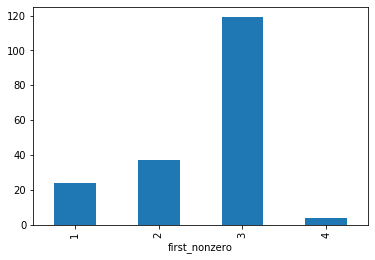

In [33]:
#number of countries by month of first case in the dataset
df["first_nonzero"].groupby(df["first_nonzero"].dt.month).count().plot(kind="bar")

#### Looking at number of days to reach 500 cases 

In [34]:
df2 = data.groupby(data['Country/Region'])['days_to_500'].min()

In [35]:
df2 = df2.reset_index()

In [36]:
df2[-df2['days_to_500'].isnull()]['days_to_500'].describe()

count                         84
mean            29 days 16:00:00
std      12 days 15:26:56.719110
min              2 days 00:00:00
25%             20 days 18:00:00
50%             28 days 00:00:00
75%             35 days 12:00:00
max             60 days 00:00:00
Name: days_to_500, dtype: object

In [37]:
df2[-df2['days_to_500'].isnull()].sort_values(by='days_to_500', ascending=False)

,Country/Region,days_to_500
150,Singapore,60 days
165,Thailand,60 days
174,United Arab Emirates,60 days
8,Australia,56 days
78,India,54 days
133,Philippines,54 days
138,Russia,54 days
60,Finland,52 days
105,Malaysia,51 days
171,US,46 days


#### Looking at number of days to reach 1000 cases from 500 cases

In [38]:
df3 = data.groupby(data['Country/Region'])['days_500_to_1000'].min()

In [39]:
df3 = df3.reset_index()

In [40]:
df3[-df3['days_500_to_1000'].isnull()]['days_500_to_1000'].describe()

count                        63
mean     4 days 09:54:17.142857
std      2 days 13:48:46.291099
min             1 days 00:00:00
25%             3 days 00:00:00
50%             4 days 00:00:00
75%             5 days 00:00:00
max            13 days 00:00:00
Name: days_500_to_1000, dtype: object

In [41]:
df3[-df3['days_500_to_1000'].isnull()].sort_values(by='days_500_to_1000', ascending=False)

,Country/Region,days_500_to_1000
86,Japan,13 days
152,Slovenia,12 days
136,Qatar,11 days
81,Iraq,9 days
56,Estonia,9 days
150,Singapore,9 days
52,Egypt,8 days
67,Greece,7 days
77,Iceland,7 days
121,New Zealand,7 days


References  
https://stackoverflow.com/questions/51810163/finding-first-non-zero-entry-across-columns-in-pandas 